<a href="https://colab.research.google.com/github/Suchir2004/disaster_analysis-/blob/main/all_algo_compare.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tensorflow matplotlib pandas


In [2]:
# Import libraries
import os
import tensorflow as tf
from tensorflow.keras.applications import (
    ResNet50, MobileNetV2, VGG16, InceptionV3
)
from tensorflow.keras.applications import EfficientNetV2B0 as VisionTransformer
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import pandas as pd

# Define constants
DATASET_DIR = "/content/sample_data"  # Change this to your dataset folder name
IMG_SIZE = (224, 224)
BATCH_SIZE = 32
EPOCHS = 10

# Data loading and preprocessing
datagen = ImageDataGenerator(validation_split=0.2, rescale=1.0 / 255)

train_data = datagen.flow_from_directory(
    DATASET_DIR, target_size=IMG_SIZE, batch_size=BATCH_SIZE, subset="training"
)

val_data = datagen.flow_from_directory(
    DATASET_DIR, target_size=IMG_SIZE, batch_size=BATCH_SIZE, subset="validation"
)


Found 64 images belonging to 4 classes.
Found 15 images belonging to 4 classes.


In [3]:
# Define a function to build and train models
def train_model(base_model_fn, name):
    print(f"\nTraining {name} model...")
    # Load base model
    base_model = base_model_fn(weights="imagenet", include_top=False, input_shape=(*IMG_SIZE, 3))
    base_model.trainable = False  # Freeze pre-trained layers

    # Build custom classification head
    model = models.Sequential([
        base_model,
        layers.GlobalAveragePooling2D(),
        layers.Dense(128, activation="relu"),
        layers.Dropout(0.5),
        layers.Dense(len(train_data.class_indices), activation="softmax"),
    ])

    model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

    # Train model
    history = model.fit(
        train_data,
        validation_data=val_data,
        epochs=EPOCHS,
        verbose=1,
    )
    return history, model

# Train models
models_to_train = {
    "ViT": VisionTransformer,
    "ResNet50": ResNet50,
    "MobileNetV2": MobileNetV2,
    "VGG16": VGG16,
    "InceptionV3": InceptionV3,
}

histories = {}
trained_models = {}

for name, base_model_fn in models_to_train.items():
    history, model = train_model(base_model_fn, name)
    histories[name] = history
    trained_models[name] = model



Training ViT model...
24274472/24274472 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


2/2 ━━━━━━━━━━━━━━━━━━━━ 20s 5s/step - accuracy: 0.1354 - loss: 1.4374 - val_accuracy: 0.3333 - val_loss: 1.1397
Epoch 2/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 2s/step - accuracy: 0.2917 - loss: 1.2291 - val_accuracy: 0.3333 - val_loss: 1.1401
Epoch 3/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 7s 3s/step - accuracy: 0.3958 - loss: 1.2116 - val_accuracy: 0.3333 - val_loss: 1.1232
Epoch 4/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 2s/step - accuracy: 0.3646 - loss: 1.2168 - val_accuracy: 0.3333 - val_loss: 1.1047
Epoch 5/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 3s/step - accuracy: 0.2604 - loss: 1.2856 - val_accuracy: 0.3333 - val_loss: 1.1098
Epoch 6/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 2s/step - accuracy: 0.3750 - loss: 1.1986 - val_accuracy: 0.3333 - val_loss: 1.1163
Epoch 7/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 3s/step - accuracy: 0.3646 - loss: 1.1925 - val_accuracy: 0.3333 - val_loss: 1.1059
Epoch 8/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 6s 4s/step - accuracy: 0.2708 - loss: 1.2240 - val_accuracy: 0.3333 - val_loss: 1.1068
Epoch 9/10
2/2 ━━━━━━━━━━━

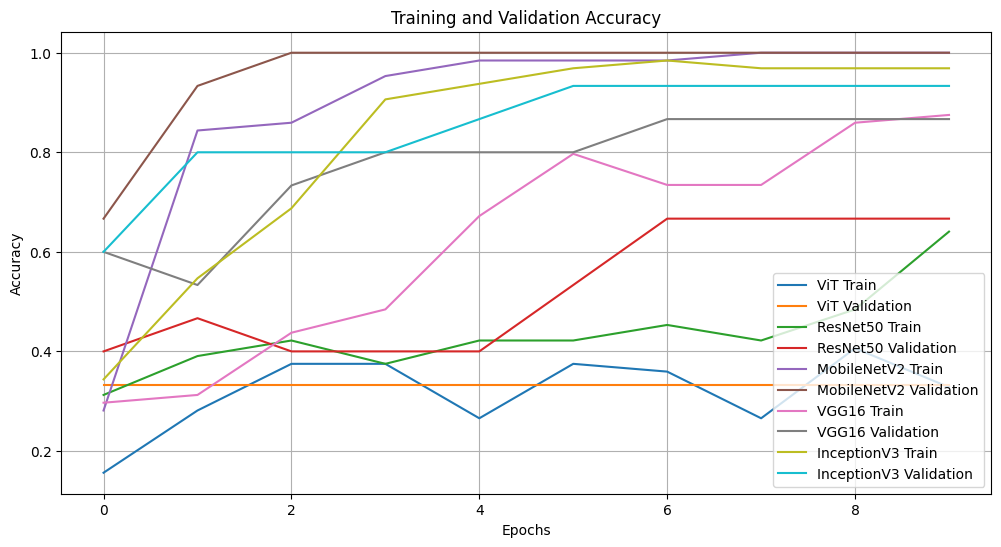

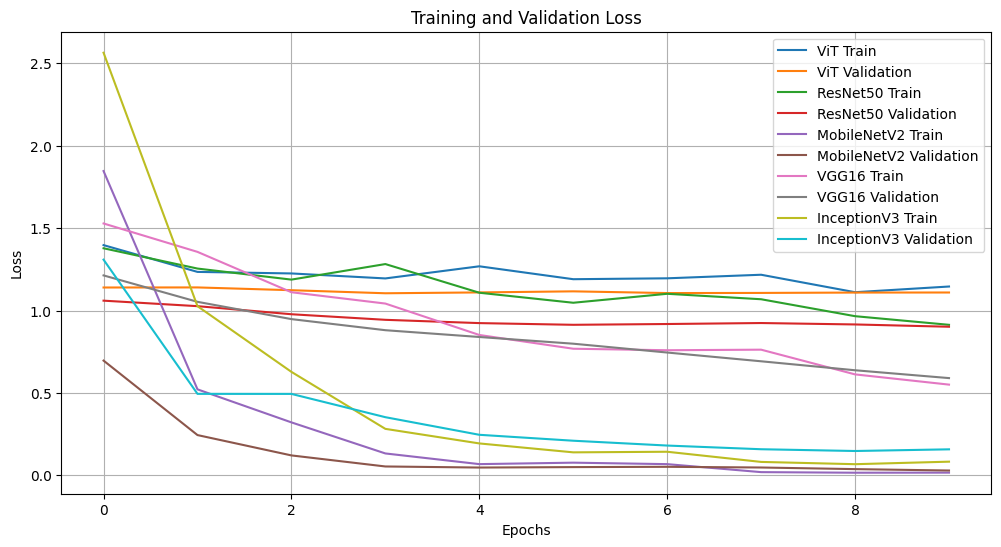

In [4]:
# Plot training and validation accuracy and loss
def plot_metrics(histories, metric="accuracy"):
    plt.figure(figsize=(12, 6))
    for name, history in histories.items():
        plt.plot(history.history[metric], label=f"{name} Train")
        plt.plot(history.history[f"val_{metric}"], label=f"{name} Validation")
    plt.title(f"Training and Validation {metric.capitalize()}")
    plt.xlabel("Epochs")
    plt.ylabel(metric.capitalize())
    plt.legend()
    plt.grid()
    plt.show()

plot_metrics(histories, metric="accuracy")
plot_metrics(histories, metric="loss")


Evaluating ViT...
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 750ms/step - accuracy: 0.3333 - loss: 1.1093


Evaluating ResNet50...
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.6667 - loss: 0.9016


Evaluating MobileNetV2...
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 991ms/step - accuracy: 1.0000 - loss: 0.0292


Evaluating VGG16...
1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step - accuracy: 0.8667 - loss: 0.5899


Evaluating InceptionV3...
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.9333 - loss: 0.1578


         Model  Accuracy      Loss
0          ViT  0.333333  1.109326
1     ResNet50  0.666667  0.901570
2  MobileNetV2  1.000000  0.029190
3        VGG16  0.866667  0.589949
4  InceptionV3  0.933333  0.157754


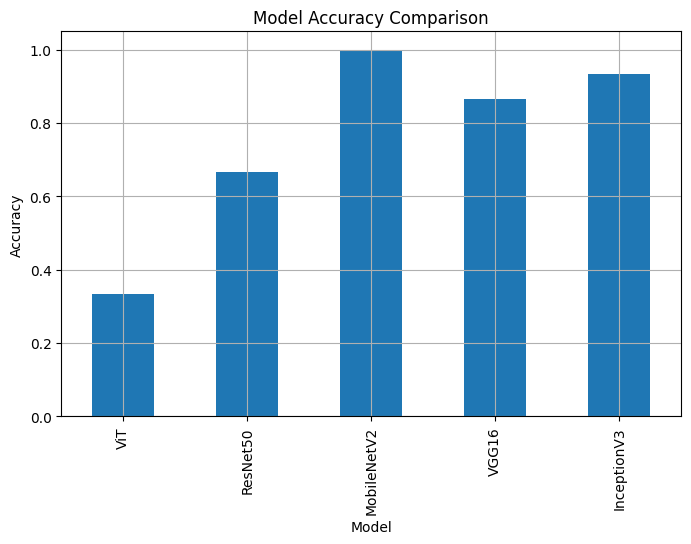

In [5]:
# Save models and evaluate final accuracy
results = []

for name, model in trained_models.items():
    print(f"Evaluating {name}...")
    loss, acc = model.evaluate(val_data)
    results.append({"Model": name, "Accuracy": acc, "Loss": loss})
    model.save(f"{name}_model.h5")

# Display results
results_df = pd.DataFrame(results)
print(results_df)

# Plot final comparison of accuracies
results_df.set_index("Model", inplace=True)
results_df["Accuracy"].plot(kind="bar", figsize=(8, 5), title="Model Accuracy Comparison", grid=True)
plt.ylabel("Accuracy")
plt.show()
